In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime as dt

# Production

In [2]:
# Load file
production_df = pd.read_csv("Resources/percent_production.csv")
production_df = production_df.sort_values('release_date')
production_df

,movie_id,release_date,percent_female
11670,43395,1950-01-01,0.000000
8717,83015,1950-01-01,0.000000
10830,109364,1950-01-01,0.000000
1576,43391,1950-01-04,0.000000
10697,151310,1950-01-13,0.000000
...,...,...,...
14964,354282,2017-08-31,1.000000
14437,374471,2017-09-14,0.500000
14133,300665,2017-09-14,0.111111
14984,398818,2017-10-27,0.200000


In [3]:
# change release_date column from string to datetime
# https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.toordinal.html

production_df['release_date'] = pd.to_datetime(production_df['release_date'])
production_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [4]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
production_df['year_month'] = pd.to_datetime(production_df['release_date']).dt.strftime('%Y-%m')
production_df

,movie_id,release_date,percent_female,year_month
11670,43395,1950-01-01,0.000000,1950-01
8717,83015,1950-01-01,0.000000,1950-01
10830,109364,1950-01-01,0.000000,1950-01
1576,43391,1950-01-04,0.000000,1950-01
10697,151310,1950-01-13,0.000000,1950-01
...,...,...,...,...
14964,354282,2017-08-31,1.000000,2017-08
14437,374471,2017-09-14,0.500000,2017-09
14133,300665,2017-09-14,0.111111,2017-09
14984,398818,2017-10-27,0.200000,2017-10


In [5]:
# convert year_month column to datetime format
production_df['year_month'] = pd.to_datetime(production_df['year_month'])
production_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [6]:
# convert year_month to ordinal for ML
production_df['year_month']=production_df['year_month'].map(dt.datetime.toordinal)
production_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [7]:
prod_count = production_df.groupby(['year_month'])['percent_female'].mean()
prod_count

year_month
711858    0.000000
711889    0.000000
711917    0.000000
711948    0.000000
711978    0.000000
            ...   
736511    0.228992
736542    0.429702
736573    0.305556
736603    0.200000
736664    0.285714
Name: percent_female, Length: 815, dtype: float64

DONT RERUN

In [8]:
# Change from series to df
production = prod_count.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
production = production.rename_axis('year_month').reset_index()

# Review df
production

,year_month,percent_female
0,711858,0.000000
1,711889,0.000000
2,711917,0.000000
3,711948,0.000000
4,711978,0.000000
...,...,...
810,736511,0.228992
811,736542,0.429702
812,736573,0.305556
813,736603,0.200000


Review data distribution before applying ML model

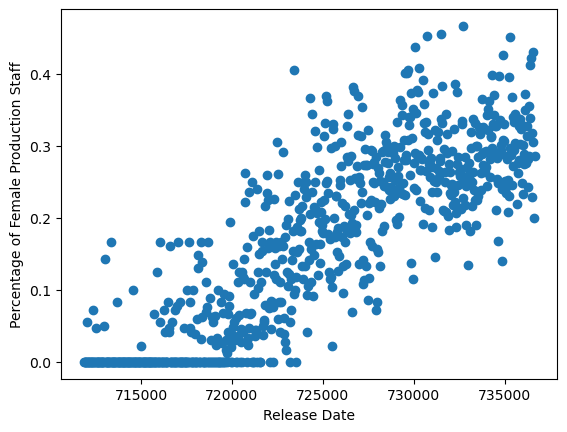

In [9]:
# Preview data
plt.scatter(production.year_month, production.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Production Staff')
plt.show()

In [10]:
#  x axis 
X = production.year_month.values.reshape(-1, 1)
X

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [11]:
y = production.percent_female
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
810    0.228992
811    0.429702
812    0.305556
813    0.200000
814    0.285714
Name: percent_female, Length: 815, dtype: float64

In [12]:
model_prod = LinearRegression()

In [13]:
model_prod.fit(X, y)

LinearRegression()

In [14]:
yp_pred = model_prod.predict(X)
print(yp_pred.shape)
print(len(yp_pred))

(815,)
815


In [15]:
X_transform = pd.Series(list(X))
X_transform = X_transform.apply(dt.datetime.fromordinal)
X_transform = pd.to_datetime(X_transform).dt.strftime('%Y-%m')
X_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
810    2017-07
811    2017-08
812    2017-09
813    2017-10
814    2017-12
Length: 815, dtype: object

Production Graph

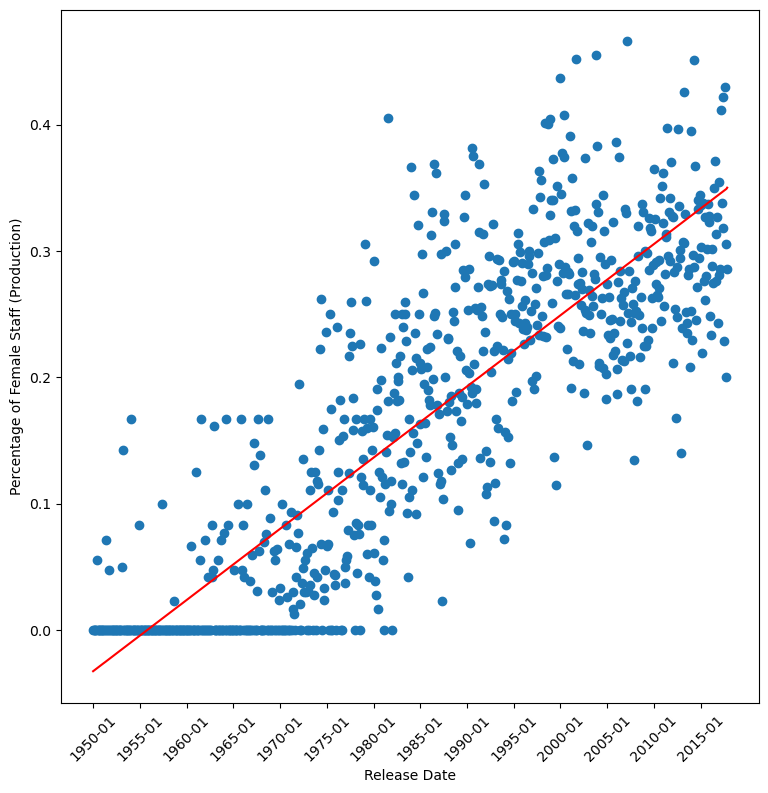

In [16]:
plt.figure(figsize=(9,9))

plt.scatter(X_transform, y)
plt.plot(X_transform, yp_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (Production)')

plt.xticks(np.arange(0, len(X_transform)+1, 60),rotation=45)

plt.show()

Production linear regression equation

In [17]:
print('Weight coefficients: ', model_prod.coef_)
print('y-axis intercept: ', model_prod.intercept_)

Weight coefficients:  [1.54283798e-05]
y-axis intercept:  -11.015438277311976


In [18]:
production.corr()

,year_month,percent_female
year_month,1.000000,0.857818
percent_female,0.857818,1.000000


In [19]:
def calc_year_month(slope, intercept, y_value):
    return (y_value- intercept)/slope


When would we have a 50% of female participation in the Production department according to the linear regression model?

In [20]:
production_fiftypercent = calc_year_month(model_prod.coef_,model_prod.intercept_, 0.5)
print(production_fiftypercent)

[746380.27115613]


Production Accuracy

In [21]:
predictions_prod = model_prod.predict(X)


In [22]:
# error delete prediction vs actual data
error_prod = predictions_prod - y

In [23]:
production_error_df = pd.DataFrame({"Predicted": predictions_prod, "Actual": y, "Error": error_prod})[["Predicted", "Actual", "Error"]]
production_error_df

,Predicted,Actual,Error
0,-0.032623,0.000000,-0.032623
1,-0.032144,0.000000,-0.032144
2,-0.031712,0.000000,-0.031712
3,-0.031234,0.000000,-0.031234
4,-0.030771,0.000000,-0.030771
...,...,...,...
810,0.347733,0.228992,0.118742
811,0.348211,0.429702,-0.081490
812,0.348690,0.305556,0.043134
813,0.349153,0.200000,0.149153


In [24]:
production_error_df.describe()

,Predicted,Actual,Error
count,815.000000,815.000000,8.150000e+02
mean,0.158493,0.158493,-6.302389e-16
std,0.110552,0.128876,6.623613e-02
min,-0.032623,0.000000,-2.602119e-01
25%,0.062933,0.000000,-3.479579e-02
50%,0.158489,0.166667,3.648291e-03
75%,0.254067,0.268915,4.662550e-02
max,0.350094,0.466013,1.820802e-01


Residuals graph

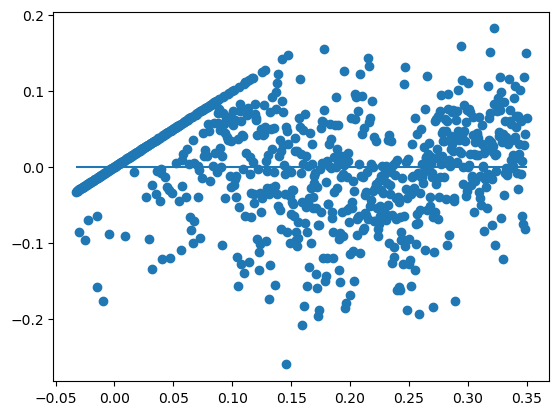

In [25]:
# Plot Residuals
plt.scatter(predictions_prod, error_prod)
plt.hlines(y=0, xmin=predictions_prod.min(), xmax=predictions_prod.max())
plt.show()

# Writing


In [26]:
writing_df = pd.read_csv("Resources/percent_writing.csv")
writing_df = writing_df.sort_values('release_date')
writing_df

,movie_id,release_date,percent_female
11006,83015,1950-01-01,0.0
1828,43391,1950-01-04,0.0
17484,65586,1950-01-06,0.0
12152,20088,1950-01-12,0.0
13721,151310,1950-01-13,1.0
...,...,...,...
20552,428493,2017-09-01,0.0
19673,374471,2017-09-14,0.0
21321,439502,2017-09-22,0.0
20454,398818,2017-10-27,0.0


In [27]:
# change release_date column from string to datetime
writing_df['release_date'] = pd.to_datetime(writing_df['release_date'])
writing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [28]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
writing_df['year_month'] = pd.to_datetime(writing_df['release_date']).dt.strftime('%Y-%m')
writing_df

,movie_id,release_date,percent_female,year_month
11006,83015,1950-01-01,0.0,1950-01
1828,43391,1950-01-04,0.0,1950-01
17484,65586,1950-01-06,0.0,1950-01
12152,20088,1950-01-12,0.0,1950-01
13721,151310,1950-01-13,1.0,1950-01
...,...,...,...,...
20552,428493,2017-09-01,0.0,2017-09
19673,374471,2017-09-14,0.0,2017-09
21321,439502,2017-09-22,0.0,2017-09
20454,398818,2017-10-27,0.0,2017-10


In [29]:
# convert year_month column to datetime format
writing_df['year_month'] = pd.to_datetime(writing_df['year_month'])
writing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [30]:
# convert year_month to ordinal for ML
writing_df['year_month']=writing_df['year_month'].map(dt.datetime.toordinal)
writing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [31]:
writ_count = writing_df.groupby(['year_month'])['percent_female'].mean()
writ_count

year_month
711858    0.125000
711889    0.060606
711917    0.027778
711948    0.000000
711978    0.125000
            ...   
736511    0.312500
736542    0.062500
736573    0.000000
736603    0.000000
736664    0.000000
Name: percent_female, Length: 815, dtype: float64

DONT RERUN

In [32]:
# Change from series to df
writing = writ_count.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
writing  = writing.rename_axis('year_month').reset_index()

# Review df
writing

,year_month,percent_female
0,711858,0.125000
1,711889,0.060606
2,711917,0.027778
3,711948,0.000000
4,711978,0.125000
...,...,...
810,736511,0.312500
811,736542,0.062500
812,736573,0.000000
813,736603,0.000000


Review data distribution before applying ML model

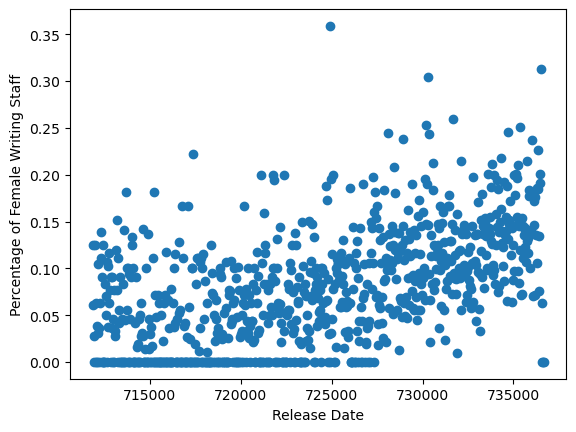

In [33]:
# Preview data
plt.scatter(writing.year_month, writing.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Writing Staff')
plt.show()

In [34]:
# Reshape values
Xw = writing.year_month.values.reshape(-1, 1)
Xw

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [35]:
yw = writing.percent_female
yw

0      0.125000
1      0.060606
2      0.027778
3      0.000000
4      0.125000
         ...   
810    0.312500
811    0.062500
812    0.000000
813    0.000000
814    0.000000
Name: percent_female, Length: 815, dtype: float64

In [36]:
model_writ = LinearRegression()

In [37]:
model_writ.fit(Xw, yw)

LinearRegression()

In [38]:
yw_pred = model_writ.predict(Xw)
print(yw_pred.shape)
print(len(yw_pred))

(815,)
815


In [39]:
Xw_transform = pd.Series(list(Xw))
Xw_transform = Xw_transform.apply(dt.datetime.fromordinal)
Xw_transform = pd.to_datetime(Xw_transform).dt.strftime('%Y-%m')
Xw_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
810    2017-07
811    2017-08
812    2017-09
813    2017-10
814    2017-12
Length: 815, dtype: object

Writing Graph

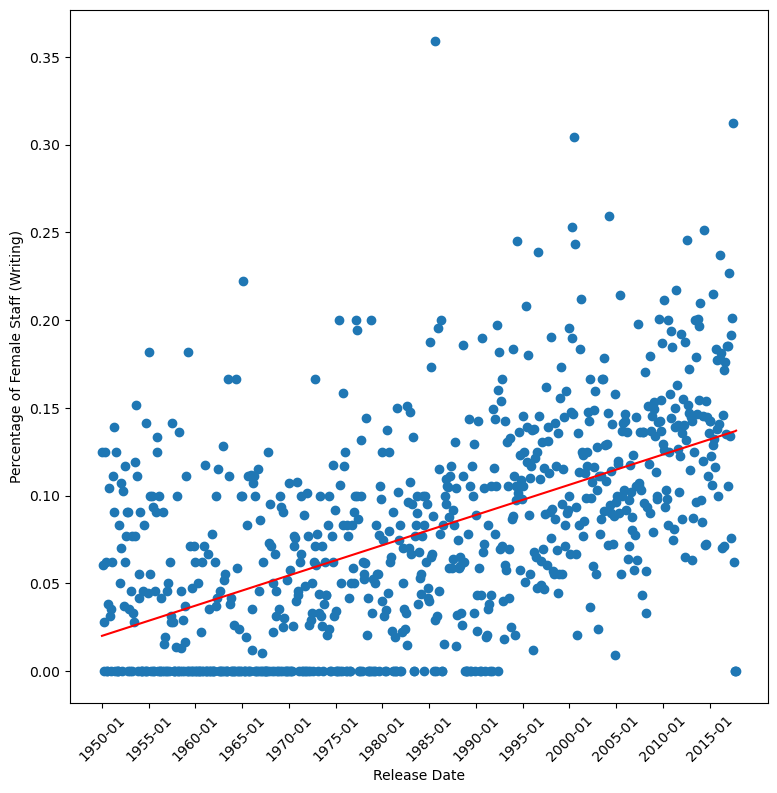

In [40]:
plt.figure(figsize=(9,9))

plt.scatter(Xw_transform, yw)
plt.plot(Xw_transform, yw_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (Writing)')

plt.xticks(np.arange(0, len(Xw_transform)+1, 60),rotation=45)

plt.show()

Writing linear regression equation

In [41]:
print('Weight coefficients: ', model_writ.coef_)
print('y-axis intercept: ', model_writ.intercept_)

Weight coefficients:  [4.71404635e-06]
y-axis intercept:  -3.335578804469447


In [42]:
writing.corr()

,year_month,percent_female
year_month,1.000000,0.544277
percent_female,0.544277,1.000000


Correlation of 0.53 shows no significant association between time and female participation in the writing department

When would we have a 50% of female participation in the Writing department according to the linear regression model?

In [43]:
writing_fiftypercent = calc_year_month(model_writ.coef_,model_writ.intercept_, 0.5)
print(writing_fiftypercent)

[813648.93709867]


Writing accuracy

In [44]:
predictions_writ = model_writ.predict(Xw)
# error delete prediction vs actual data
error_writ = predictions_writ - yw

In [45]:
writing_error_df = pd.DataFrame({"Predicted": predictions_writ, "Actual": yw, "Error": error_writ})[["Predicted", "Actual", "Error"]]
writing_error_df

,Predicted,Actual,Error
0,0.020153,0.125000,-0.104847
1,0.020299,0.060606,-0.040307
2,0.020431,0.027778,-0.007347
3,0.020577,0.000000,0.020577
4,0.020718,0.125000,-0.104282
...,...,...,...
810,0.136368,0.312500,-0.176132
811,0.136514,0.062500,0.074014
812,0.136660,0.000000,0.136660
813,0.136802,0.000000,0.136802


In [46]:
writing_error_df.describe()

,Predicted,Actual,Error
count,815.000000,815.000000,8.150000e+02
mean,0.078547,0.078547,2.356670e-17
std,0.033779,0.062061,5.206348e-02
min,0.020153,0.000000,-2.774117e-01
25%,0.049349,0.025641,-2.953946e-02
50%,0.078546,0.076923,5.428221e-03
75%,0.107749,0.118168,3.822938e-02
max,0.137089,0.358974,1.370894e-01


Residuals graph

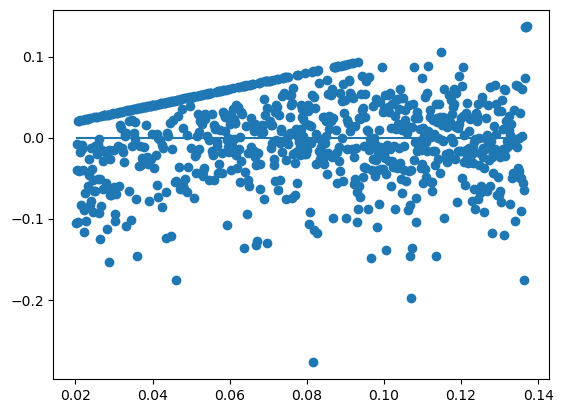

In [47]:
# Plot Residuals
plt.scatter(predictions_writ, error_writ)
plt.hlines(y=0, xmin=predictions_writ.min(), xmax=predictions_writ.max())
plt.show()

# Directing

In [48]:
# Load file
directing_df = pd.read_csv("Resources/percent_directing.csv")
directing_df = directing_df.sort_values('release_date')

In [49]:
# change release_date column from string to datetime
directing_df['release_date'] = pd.to_datetime(directing_df['release_date'])
directing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [50]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
directing_df['year_month'] = pd.to_datetime(directing_df['release_date']).dt.strftime('%Y-%m')
directing_df

,movie_id,release_date,percent_female,year_month
17465,43395,1950-01-01,0.0,1950-01
15517,43387,1950-01-01,0.0,1950-01
12394,83015,1950-01-01,0.0,1950-01
15847,109364,1950-01-01,0.0,1950-01
2007,43391,1950-01-04,0.0,1950-01
...,...,...,...,...
24761,426264,2017-08-31,0.0,2017-08
24387,428493,2017-09-01,0.0,2017-09
25296,439502,2017-09-22,0.0,2017-09
24275,398818,2017-10-27,0.0,2017-10


In [51]:
# convert year_month column to datetime format
directing_df['year_month'] = pd.to_datetime(directing_df['year_month'])
directing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [52]:
# convert year_month to ordinal for ML
directing_df['year_month']=directing_df['year_month'].map(dt.datetime.toordinal)
directing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [53]:
directing_count = directing_df.groupby(['year_month'])['percent_female'].mean()
directing_count

year_month
711858    0.000000
711889    0.000000
711917    0.000000
711948    0.000000
711978    0.041667
            ...   
736511    0.131579
736542    0.000000
736573    0.000000
736603    0.000000
736664    0.000000
Name: percent_female, Length: 815, dtype: float64

DONT RERUN

In [54]:
# Change from series to df
directing = directing_count.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
directing  = directing.rename_axis('year_month').reset_index()

# Review df
directing

,year_month,percent_female
0,711858,0.000000
1,711889,0.000000
2,711917,0.000000
3,711948,0.000000
4,711978,0.041667
...,...,...
810,736511,0.131579
811,736542,0.000000
812,736573,0.000000
813,736603,0.000000


Review data distribution before applying ML model

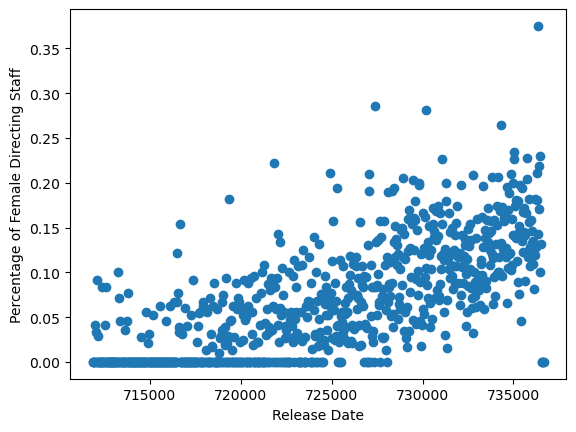

In [55]:
# Preview data
plt.scatter(directing.year_month, directing.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Directing Staff')
plt.show()

In [56]:
#  x axis 
Xd = directing.year_month.values.reshape(-1, 1)
Xd

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [57]:
yd = directing.percent_female
yd

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.041667
         ...   
810    0.131579
811    0.000000
812    0.000000
813    0.000000
814    0.000000
Name: percent_female, Length: 815, dtype: float64

In [58]:
model_dir = LinearRegression()

In [59]:
model_dir.fit(Xd, yd)

LinearRegression()

In [60]:
yd_pred = model_dir.predict(Xd)
print(yd_pred.shape)
print(len(yd_pred))

(815,)
815


In [61]:
Xd_transform = pd.Series(list(Xd))
Xd_transform = Xd_transform.apply(dt.datetime.fromordinal)
Xd_transform = pd.to_datetime(Xd_transform).dt.strftime('%Y-%m')
Xd_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
810    2017-07
811    2017-08
812    2017-09
813    2017-10
814    2017-12
Length: 815, dtype: object

Direction Graph

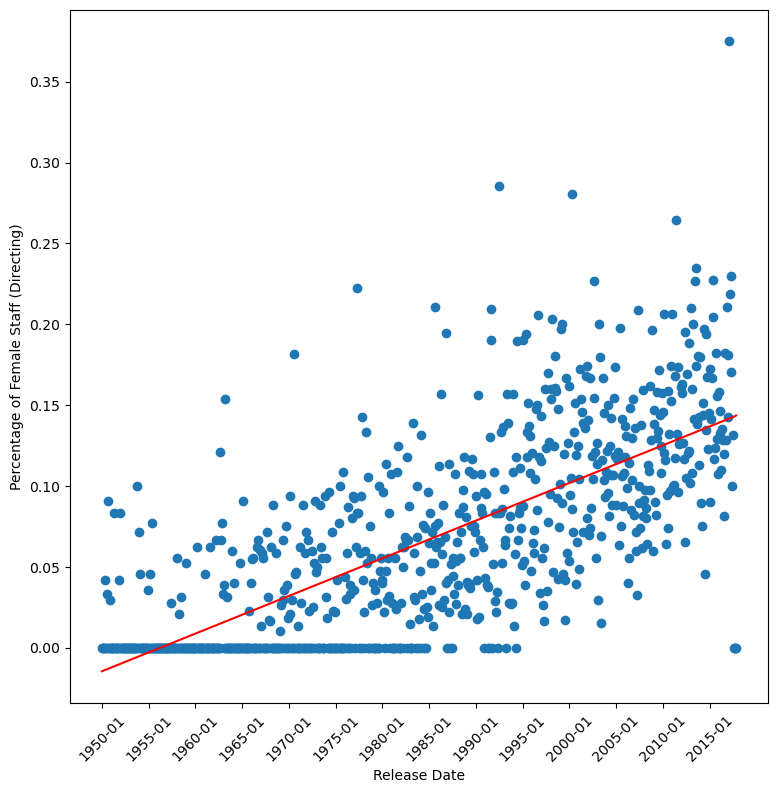

In [62]:
plt.figure(figsize=(9,9))

plt.scatter(Xd_transform, yd)
plt.plot(Xd_transform, yd_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (Directing)')

plt.xticks(np.arange(0, len(Xd_transform)+1, 60),rotation=45)

plt.show()

Direction linear regression equation

In [63]:
print('Weight coefficients: ', model_dir.coef_)
print('y-axis intercept: ', model_dir.intercept_)

Weight coefficients:  [6.37528608e-06]
y-axis intercept:  -4.55287217983898


In [64]:
directing.corr()

,year_month,percent_female
year_month,1.000000,0.721191
percent_female,0.721191,1.000000


Correlation of 0.70 shows moderate positive correlation between time and female participation in the directing department

When would we have a 50% of female participation in the Directing department according to the linear regression model?

In [65]:
directing_fiftypercent = calc_year_month(model_dir.coef_,model_dir.intercept_, 0.5)
print(directing_fiftypercent)

[792571.83375597]


Directiong accuracy

In [66]:
predictions_dir = model_dir.predict(Xd)
# error delete prediction vs actual data
error_dir = predictions_dir - yd

In [67]:
directing_error_df = pd.DataFrame({"Predicted": predictions_dir, "Actual": yd, "Error": error_dir})[["Predicted", "Actual", "Error"]]
directing_error_df

,Predicted,Actual,Error
0,-0.014574,0.000000,-0.014574
1,-0.014376,0.000000,-0.014376
2,-0.014198,0.000000,-0.014198
3,-0.014000,0.000000,-0.014000
4,-0.013809,0.041667,-0.055475
...,...,...,...
810,0.142596,0.131579,0.011017
811,0.142794,0.000000,0.142794
812,0.142991,0.000000,0.142991
813,0.143183,0.000000,0.143183


In [68]:
writing_error_df.describe()

,Predicted,Actual,Error
count,815.000000,815.000000,8.150000e+02
mean,0.078547,0.078547,2.356670e-17
std,0.033779,0.062061,5.206348e-02
min,0.020153,0.000000,-2.774117e-01
25%,0.049349,0.025641,-2.953946e-02
50%,0.078546,0.076923,5.428221e-03
75%,0.107749,0.118168,3.822938e-02
max,0.137089,0.358974,1.370894e-01


Residuals graph

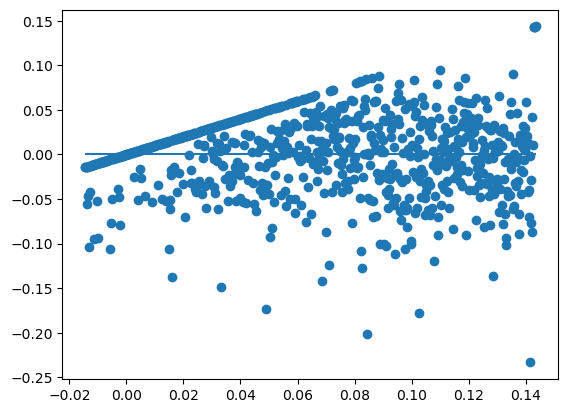

In [69]:
# Plot Residuals
plt.scatter(predictions_dir, error_dir)
plt.hlines(y=0, xmin=predictions_dir.min(), xmax=predictions_dir.max())
plt.show()